# Module 09 Assignment 2: Financial Time Series


Isha Singh


Professor Irene Tsapara


MSDS 422 Practical Machine Learning 


9 March 2025

### PART 01 Introduction

##### Module 09 focuses on the prediction of stock prices with the help of deep learning models. The data that will be used is from Yahoo Finance’s historical stock price data of Uber, a ride-sharing company. The models that are being used in this research are RNNs (Recurrent Neural Networks), LSTMs (Long Short-Term Memory), and GRUs (Gated Recurrent Units). To improve the three models, hyperparameters will be used. Some hyperparameters consist of dropout rates, learning rates, and batch sizes. Afterwards, to measure their performance, Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), Mean Squared Error (MSE), and R² Score will be calculated. Alongside, there will be an evaluation of models using loss curves, residual analysis, and, last but not least, actual vs. predicted price comparisons. This module will teach us to understand which is the best model for predicting stock prices as well as understanding how well deep learning can be used for financial forecasting.



### PART 02 Data load / Libraries load

Libraries load

In [1]:
import numpy as np

In [2]:
from sklearn.model_selection import TimeSeriesSplit

In [3]:
from tensorflow.keras.optimizers import Adam


In [4]:
from tensorflow.keras.layers import GRU

In [5]:
import pandas as pd

In [6]:
from sklearn.metrics import r2_score

In [7]:
import matplotlib.pyplot as plt

In [8]:
import yfinance as yf

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
import seaborn as sns

In [12]:
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
import numpy as np

In [15]:
import yfinance as yf

In [16]:
from sklearn.preprocessing import MinMaxScaler

Data load 

In [61]:
np.random.seed(42)
ticker = 'UBER'
data = yf.download(ticker, period='5y')
print("Data shape:", data.shape)
data.head()


[*********************100%***********************]  1 of 1 completed

Data shape: (1257, 5)


Price,Close,High,Low,Open,Volume
Ticker,UBER,UBER,UBER,UBER,UBER
Date,,,,,
2020-03-09,28.170000,30.320000,28.150000,28.500000,37439200
2020-03-10,28.969999,29.860001,27.000000,29.469999,36308300
2020-03-11,26.240000,28.139999,25.610001,27.910000,43067800
2020-03-12,22.610001,24.690001,22.110001,23.260000,54042000
2020-03-13,22.600000,24.809999,21.129999,24.010000,53844400


### PART 03 Data Presentation

#### The following dataset focuses on the historical stock prices for the company Uber, which was collected from the library Yahoo Finance. The following data focuses on a 5-year period which includes the following columns: Close price (the final stock price at the end of each trading day), High price (the highest price Uber’s stock reached on that specific day), Low price (the lowest price for that specific day), Open price (the stock price at the beginning of the trading day), and Volume (the total number of shares traded within that day). After retrieving the dataset, there were 1,257 rows and 5 columns (which were mentioned earlier).

### PART 04 EDA of DATASET

In [59]:
prices = data['Close'].values.reshape(-1, 1)

In [62]:
data.head()
# column_names of the data
data.columns


MultiIndex([( 'Close', 'UBER'),
            (  'High', 'UBER'),
            (   'Low', 'UBER'),
            (  'Open', 'UBER'),
            ('Volume', 'UBER')],
           names=['Price', 'Ticker'])

Summary Statistics

In [63]:
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
Price         Close         High          Low         Open        Volume
Ticker         UBER         UBER         UBER         UBER          UBER
count   1257.000000  1257.000000  1257.000000  1257.000000  1.257000e+03
mean      46.461901    47.316349    45.602602    46.474021  2.469845e+07
std       16.590126    16.740251    16.454736    16.628206  1.695152e+07
min       14.820000    17.799999    13.710000    15.960000  5.200400e+06
25%       32.360001    32.930000    31.510000    32.330002  1.579690e+07
50%       43.950001    44.830002    43.250000    44.000000  2.063350e+07
75%       59.930000    60.919998    58.689999    60.000000  2.828500e+07
max       86.339996    87.000000    84.180000    85.639999  3.642318e+08


Missing Values per Column

In [64]:
print("\nMissing values per column:")
print(data.isnull().sum())


Missing values per column:
Price   Ticker
Close   UBER      0
High    UBER      0
Low     UBER      0
Open    UBER      0
Volume  UBER      0
dtype: int64


Uber's closing prices over time


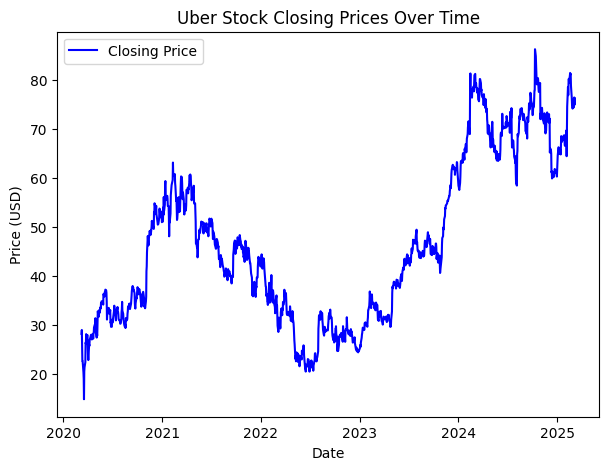

In [65]:
# Plot Uber's closing prices over time
plt.figure(figsize=(7, 5))
plt.plot(data['Close'], label="Closing Price", color='blue')
plt.title('Uber Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

Opening Prices over time

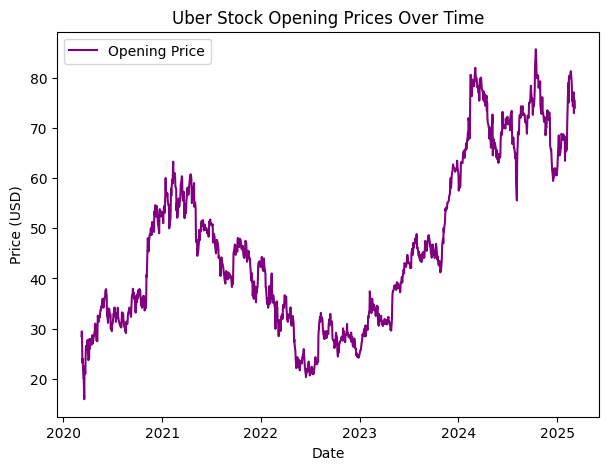

In [70]:
plt.figure(figsize=(7, 5))
plt.plot(data['Open'], label="Opening Price", color='Purple')
plt.title('Uber Stock Opening Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

Histogram of Daily Returns

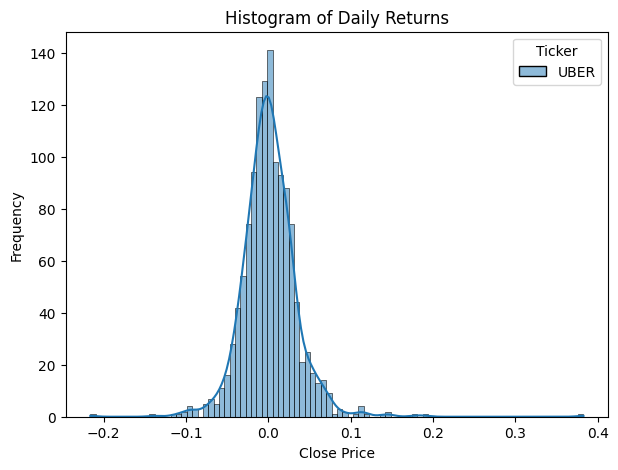

In [71]:
plt.figure(figsize=(7, 5))
sns.histplot(data['Close'].pct_change().dropna(), kde=True, color='blue')
plt.title('Histogram of Daily Returns')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

### PART 05 Overview of findings and next steps

##### To understand Uber’s stock price data at a deeper perspective, the structure and several statistical properties were explored. The exploratory data analysis section showed that the dataset contains 1,257 rows and 5 columns, with no missing values. The summary statistics revealed that the minimum closing price was $14.820000 dollars and a maximum of $86.339996 dollars, which showed a lot of fluctuations over time. Few visualizations were demonstrated in order to observe stock price trends and patterns. The daily returns histogram indicated that the most price changes are small, but there were some spikes within the years. Uber’s closing and opening prices were also studied to see how price movements evolved over time. It showed how in the years 2023-2024, the stock price was very low, which can possibly mean a period of decline or market uncertainty.The next steps in the research include preprocessing data by normalizing the data by using MinMaxScaler, and then splitting the model by training and testing datasets. Afterwards, training three models: LSTM, a second LSTM model, and lastly GRU. Each of these models will be evaluated to further understand if they were appropriate models. The evaluation will consist of MAE (Mean Absolute Error), RMSE (Root Mean Squared Error), MSE (Mean Squared Error), and R² Score to compare their performance.

### PART 06 Cleansing and Preprocessing

it is done previously or will be done in next steps

### PART 07 FEATURE ENGINEERING

In [72]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)


In [73]:
# Define a function to create input sequences and corresponding targets from the time series data.
def create_sequences(data, window_size):
    """
    This function converts a time series into sequences of a fixed window size.
    Each sequence (X) consists of 'window_size' consecutive data points,
    and the target (y) is the data point immediately following that sequence.
    
    Parameters:
      - data: The scaled time series data (a 2D NumPy array).
      - window_size: The number of time steps to include in each input sequence.
      
    Returns:
      - X: NumPy array of input sequences.
      - y: NumPy array of targets corresponding to each sequence.
    """
    # Initialize empty lists to store sequences and targets.
    X = []  # List to hold input sequences
    y = []  # List to hold corresponding targets
    
    # Loop through the data, stopping at a point that allows a full sequence of the given window size
    for i in range(len(data) - window_size):
        # For each iteration, slice the data array to create a sequence of 'window_size' data points.
        # data[i:i+window_size, 0] extracts a sequence starting at index 'i' and spanning 'window_size' steps.
        X.append(data[i:i+window_size, 0])
        
        # The target value (y) is the data point immediately after the current sequence.
        y.append(data[i+window_size, 0])
        
    # Convert the lists of sequences and targets into NumPy arrays for efficient processing.
    return np.array(X), np.array(y)

# Set the window size to 60, meaning each input sequence will contain 60 consecutive time steps.
# For example, the model will use the data from the past 60 days to predict the next day's value.
window_size = 60

# Call the function to create sequences and targets from the scaled price data.
# 'scaled_prices' is our preprocessed dataset (with values scaled between 0 and 1).
X, y = create_sequences(scaled_prices, window_size)


### PART 08 Overview presentation of the cleaned dataset

##### Before training the models, it was required to make sure the dataset was cleaned and prepared for the modeling part of the research. MinMaxScaler was used to scale Uber stock prices and adjust it to have it between 0 and 1, so that the models train more efficiently.  Next, feature engineering was completed in order to have an organized dataset for modeling. The feature engineering consisted of converting the stock prices into sequences as the model will recognize trends faster and will be able to make predictions. Then, A window size of 60 days was used to help the model analyze patterns while looking at Uber's stock prices over 60 days. With the dataset now structured, it will be split into training and testing sets so the models can begin learning and making predictions.

### PART 09 Final EDA and comparisons

not required

### PART 10 Data preprocessing specific to the model

will be shown in splitting section

### PART 11 Splitting

In [74]:
# Calculate the index to split the dataset into training and testing portions.
# We use 80% of the data for training and the remaining 20% for testing.
split = int(0.8 * len(X))

# Use array slicing to separate the input sequences and their corresponding targets:
# - X_train and y_train will contain the first 80% of the data.
# - X_test and y_test will contain the remaining 20%.
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Neural network models such as LSTM require input data to be in a specific 3-dimensional format:
# [samples, time steps, features]
# Currently, our data (X_train and X_test) is in a 2D shape (samples, time steps).
# We reshape it to add a third dimension representing the single feature per time step.
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test  = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Print the shapes of the training and testing sets to confirm the dimensions.
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (957, 60, 1)
Test set shape: (240, 60, 1)


### PART 12 Overview of the steps to be completed and the rationale

#### So far, the dataset has been cleaned up, preprocessed, and split into training and testing. The next steps will focus on model training, cross-validation, hyperparameter tuning, and, last but not least, model evaluation. The three models that will be used in the research are LSTM, a second LSTM with different settings, and finally, GRU. Each of the models will be trained with the dataset that was preprocessed above and with hyperparameter tuning. The hyperparameter tuning will include dropout rates, batch sizes, learning rates, and the number of layers. Once the models are trained, evaluations will be done in order to understand and assess their performance.  The performance metrics include Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), Mean Squared Error (MSE), and R² Score. Furthermore, loss curves, actual vs. predicted price plots, and residual analysis will also be used.  Lastly, after all the training, modeling, and evaluation steps are completed, the models will be tested on unseen data, which refers to the split test data.

### PART 13 Model training cross-validation.



In [75]:
# Define a function that creates a new instance of the RNN model
def create_model(window_size):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(window_size, 1)),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Set up TimeSeriesSplit for cross-validation (e.g., 5 splits)
tscv = TimeSeriesSplit(n_splits=5)

# List to store validation loss for each fold
val_losses = []

# Loop through each split of the training data
for fold, (train_index, val_index) in enumerate(tscv.split(X_train)):
    print(f"Training fold {fold+1}")
    
    # Split the data into current fold's training and validation sets
    X_train_cv, X_val_cv = X_train[train_index], X_train[val_index]
    y_train_cv, y_val_cv = y_train[train_index], y_train[val_index]
    
    # Create a new model instance for each fold
    model_cv = create_model(window_size)
    
    # Setup EarlyStopping to monitor validation loss for the current fold
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
    # Train the model on the current fold's training data
    history_cv = model_cv.fit(
        X_train_cv, y_train_cv,
        epochs=50,
        batch_size=32,
        validation_data=(X_val_cv, y_val_cv),
        callbacks=[early_stop],
        verbose=0  # Set verbose to 0 to reduce output clutter; change to 1 for more details
    )
    
    # Evaluate the model on the current fold's validation data
    fold_val_loss = model_cv.evaluate(X_val_cv, y_val_cv, verbose=0)
    print(f"Fold {fold+1} Validation Loss: {fold_val_loss}")
    val_losses.append(fold_val_loss)

# Calculate the average validation loss across all folds
average_val_loss = np.mean(val_losses)
print("Cross-validation validation losses:", val_losses)
print("Average validation loss:", average_val_loss)


Training fold 1


/opt/homebrew/Caskroom/miniforge/base/envs/tf-mac/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Fold 1 Validation Loss: 0.0007296802941709757
Training fold 2
Fold 2 Validation Loss: 0.0008995721582323313
Training fold 3
Fold 3 Validation Loss: 0.0012095586862415075
Training fold 4
Fold 4 Validation Loss: 0.0005094103398732841
Training fold 5
Fold 5 Validation Loss: 0.0008105927845463157
Cross-validation validation losses: [0.0007296802941709757, 0.0008995721582323313, 0.0012095586862415075, 0.0005094103398732841, 0.0008105927845463157]
Average validation loss: 0.0008317628526128829


### PART 14 Model Hypertuning 

Model 01

In [76]:
def build_lstm_model1(window_size): # Model 1
    model = Sequential([ # LSTM model with 2 layers
        LSTM(64, return_sequences=True, input_shape=(window_size, 1)), # 64 units
        Dropout(0.3),  # Dropout layer to prevent overfitting
        LSTM(64, return_sequences=False), # 64 units
        Dropout(0.3), # Dropout layer to prevent overfitting
        Dense(50, activation='relu'), # 50 units
        Dense(1) # Output layer
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error') # Adam optimizer with learning rate of 0.001
    return model

# Train Model 1
model1 = build_lstm_model1(window_size) # Build Model 1
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) # Early stopping to prevent overfitting

history1 = model1.fit( # Fit Model
    X_train, y_train,# Training data
    epochs=50, # 50 epochs
    batch_size=32, # Batch size of 32
    validation_split=0.1, # 10% validation split
    callbacks=[early_stop], # Early stopping
    verbose=1 # Verbose mode
)

# Evaluate performance
val_loss1 = model1.evaluate(X_test, y_test) # Evaluate Model 1 on test data
print(f"Model 1 Validation Loss: {val_loss1}")  # Print validation loss


Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0871 - val_loss: 0.0035
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0053 - val_loss: 0.0024
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0045 - val_loss: 0.0038
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0037 - val_loss: 7.8587e-04
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0026 - val_loss: 0.0013
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0033 - val_loss: 9.5119e-04
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0207 - val_loss: 7.7453e-04
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0206 - val_loss: 0.0199
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0119 - val_loss: 0.0051
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step

Model 02 

In [77]:
def build_lstm_model2(window_size): # Model 2
    model = Sequential([ # LSTM model with 2 layers
        LSTM(128, return_sequences=True, input_shape=(window_size, 1)),     # 128 units
        Dropout(0.2),   # Dropout layer to prevent overfitting
        LSTM(128, return_sequences=False),  # 128 units
        Dropout(0.2),   # Dropout layer to prevent overfitting
        Dense(50, activation='relu'),       # 50 units
        Dense(1)    # Output layer
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_absolute_error') # Adam optimizer with learning rate of 0.0005
    return model

# Train Model 2
model2 = build_lstm_model2(window_size) # Build Model 2

history2 = model2.fit(  # Fit Model 2
    X_train, y_train,   # Training data
    epochs=50,      # 50 epochs
    batch_size=64,  # Increased batch size
    validation_split=0.1,       # 10% validation split
    callbacks=[early_stop],    # Early stopping
    verbose=1   # Verbose mode
)

# Evaluate performance
val_loss2 = model2.evaluate(X_test, y_test) # Evaluate Model 2 on test data
print(f"Model 2 Validation Loss: {val_loss2}")  # Print validation loss


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.2898 - val_loss: 0.1520
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0636 - val_loss: 0.0923
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0461 - val_loss: 0.0541
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0376 - val_loss: 0.0249
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0351 - val_loss: 0.0415
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0334 - val_loss: 0.0234
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0322 - val_loss: 0.0220
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0305 - val_loss: 0.0213
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0304 - val_loss: 0.0222
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0312 - val_loss: 0.0205
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0297 - val_loss: 0.0225
Epoch 12/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0

Model 03

In [78]:
def build_gru_model(window_size): # Model 3
    model = Sequential([ # GRU model with 2 layers
        GRU(64, return_sequences=True, input_shape=(window_size, 1)),   # 64 units
        Dropout(0.2),  # Dropout layer to prevent overfit
        GRU(64, return_sequences=False),    # 64 units
        Dropout(0.2), # Dropout layer to prevent overfit
        Dense(50, activation='relu'),  # 50 units
        Dense(1)   # Output layer
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error') # Adam optimizer with learning rate of 0.001
    return model

model3 = build_gru_model(window_size) # Build Model 3

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) # Early stopping

history3 = model3.fit(  # Fit Model 3
    X_train, y_train,   # Training data
    epochs=50,     # 50 epochs
    batch_size=32, # Batch size of 32
    validation_split=0.1,  # 10% validation split
    callbacks=[early_stop], # Early stopping
    verbose=1  # Verbose mode
)

val_loss3 = model3.evaluate(X_test, y_test) # Evaluate Model 3 on test data
print(f"Model 3 (GRU) Validation Loss: {val_loss3}")    # Print validation loss


Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0922 - val_loss: 0.0135
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0032 - val_loss: 0.0015
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0024 - val_loss: 3.8833e-04
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0023 - val_loss: 7.4032e-04
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0021 - val_loss: 3.1687e-04
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0019 - val_loss: 3.2254e-04
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0018 - val_loss: 3.4349e-04
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0018 - val_loss: 4.3406e-04
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0015 - val_loss: 3.0153e-04
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0015 - val_loss: 3.0780e-04
Epoch 12/50
27/27 ━━━━━━━━━━━━━

In [79]:
print(f"Model 1 Validation Loss (Standard LSTM): {val_loss1}")
print(f"Model 2 Validation Loss (Alternative LSTM): {val_loss2}")
print(f"Model 3 Validation Loss (GRU): {val_loss3}")


Model 1 Validation Loss (Standard LSTM): 0.013729481026530266
Model 2 Validation Loss (Alternative LSTM): 0.026142248883843422
Model 3 Validation Loss (GRU): 0.000582014792598784


### PART 15 Model Testing 

In [80]:
loss_model1 = model1.evaluate(X_test, y_test, verbose=1) # testing on model 1
loss_model2 = model2.evaluate(X_test, y_test, verbose=1)  # testing on model 2
loss_model3 = model3.evaluate(X_test, y_test, verbose=1)  # testing on model 3

print(f"Model 1 (LSTM) Test Loss: {loss_model1}") # testing on model 1 
print(f"Model 2 (LSTM with different settings) Test Loss: {loss_model2}") # testing on model 2
print(f"Model 3 (GRU) Test Loss: {loss_model3}") # testing on model 3


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0086 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0239 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.3740e-04 
Model 1 (LSTM) Test Loss: 0.013729481026530266
Model 2 (LSTM with different settings) Test Loss: 0.026142248883843422
Model 3 (GRU) Test Loss: 0.000582014792598784


In [81]:
pred_model1 = model1.predict(X_test)
pred_model2 = model2.predict(X_test)
pred_model3 = model3.predict(X_test)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


### PART 16 Model evaluation 

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Compute MAE and RMSE for each model
mae_model1 = mean_absolute_error(y_test, pred_model1)
rmse_model1 = np.sqrt(mean_squared_error(y_test, pred_model1))
mse_model1 = mean_squared_error(y_test, pred_model1)

mae_model2 = mean_absolute_error(y_test, pred_model2)
rmse_model2 = np.sqrt(mean_squared_error(y_test, pred_model2))
mse_model2 = mean_squared_error(y_test, pred_model2)

mae_model3 = mean_absolute_error(y_test, pred_model3)
rmse_model3 = np.sqrt(mean_squared_error(y_test, pred_model3))
mse_model3 = mean_squared_error(y_test, pred_model3)

print(f"Model 1 (LSTM) - MAE: {mae_model1:.4f}, RMSE: {rmse_model1:.4f}, MSE: {mse_model1:.4f}")
print(f"Model 2 (LSTM with different settings) - MAE: {mae_model2:.4f}, RMSE: {rmse_model2:.4f}, MSE: {mse_model2:.4f}")
print(f"Model 3 (GRU) - MAE: {mae_model3:.4f}, RMSE: {rmse_model3:.4f}, MSE: {mse_model3:.4f}")


Model 1 (LSTM) - MAE: 0.1052, RMSE: 0.1172, MSE: 0.0137
Model 2 (LSTM with different settings) - MAE: 0.0261, RMSE: 0.0318, MSE: 0.0010
Model 3 (GRU) - MAE: 0.0196, RMSE: 0.0241, MSE: 0.0006


In [83]:
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

pred_model1_unscaled = scaler.inverse_transform(pred_model1.reshape(-1, 1))
pred_model2_unscaled = scaler.inverse_transform(pred_model2.reshape(-1, 1))
pred_model3_unscaled = scaler.inverse_transform(pred_model3.reshape(-1, 1))


In [84]:
import pandas as pd
# Create a DataFrame for model comparison
model_results = pd.DataFrame({
    'Model': ['LSTM Model 1', 'LSTM Model 2', 'GRU Model 3'],
    'MAE': [mae_model1, mae_model2, mae_model3],
    'RMSE': [rmse_model1, rmse_model2, rmse_model3],
    'MSE': [mse_model1, mse_model2, mse_model3]
})


print("Model Comparison:")
model_results

Model Comparison:


,Model,MAE,RMSE,MSE
0,LSTM Model 1,0.105207,0.117173,0.013729
1,LSTM Model 2,0.026142,0.031819,0.001012
2,GRU Model 3,0.019611,0.024125,0.000582


Actual vs Predicted

Model 01 - LTSM

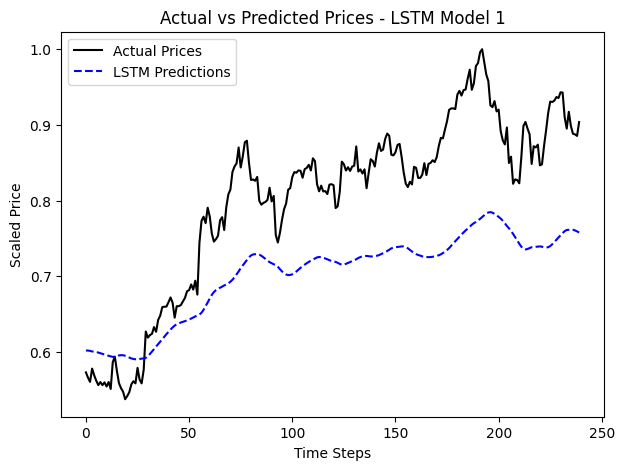

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.plot(y_test, label='Actual Prices', color='black')
plt.plot(pred_model1, label='LSTM Predictions', color='blue', linestyle='dashed')
plt.title('Actual vs Predicted Prices - LSTM Model 1')
plt.xlabel('Time Steps')
plt.ylabel('Scaled Price')
plt.legend()
plt.show()


Model 02 - LTSM TUNED 

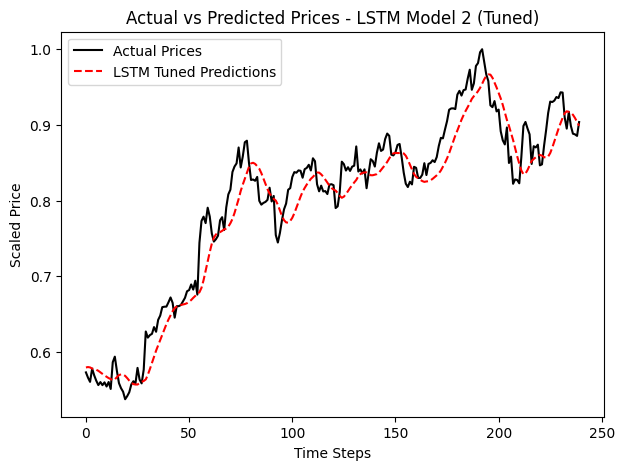

In [86]:
plt.figure(figsize=(7, 5))
plt.plot(y_test, label='Actual Prices', color='black')
plt.plot(pred_model2, label='LSTM Tuned Predictions', color='red', linestyle='dashed')
plt.title('Actual vs Predicted Prices - LSTM Model 2 (Tuned)')
plt.xlabel('Time Steps')
plt.ylabel('Scaled Price')
plt.legend()
plt.show()


Model 03- GRU

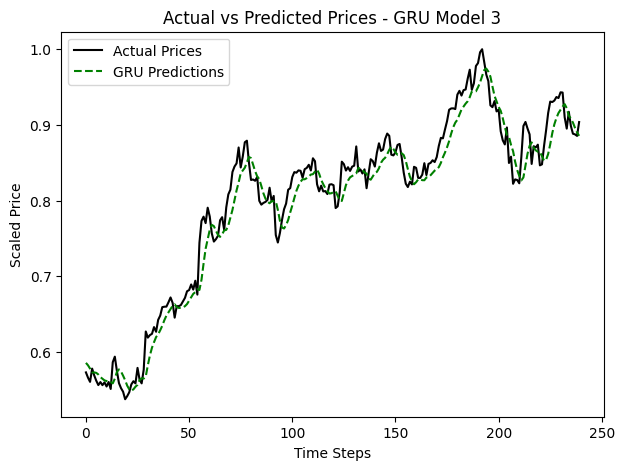

In [87]:

plt.figure(figsize=(7, 5))
plt.plot(y_test, label='Actual Prices', color='black')
plt.plot(pred_model3, label='GRU Predictions', color='green', linestyle='dashed')
plt.title('Actual vs Predicted Prices - GRU Model 3')
plt.xlabel('Time Steps')
plt.ylabel('Scaled Price')
plt.legend()
plt.show()


PEROFRMANCE METRICS

In [88]:
models = ["LSTM Model 1", "LSTM Model 2", "GRU Model 3"]
mae_values = [mae_model1, mae_model2, mae_model3]
rmse_values = [rmse_model1, rmse_model2, rmse_model3]
mse_values = [mse_model1, mse_model2, mse_model3]

MAE 

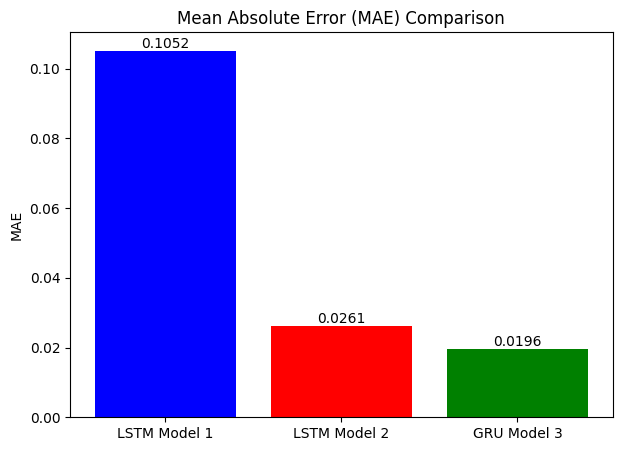

In [89]:
plt.figure(figsize=(7, 5))
bars = plt.bar(models, mae_values, color=['blue', 'red', 'green'])
plt.title('Mean Absolute Error (MAE) Comparison')
plt.ylabel('MAE')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.4f}", ha='center', va='bottom')

plt.show()

RMSE

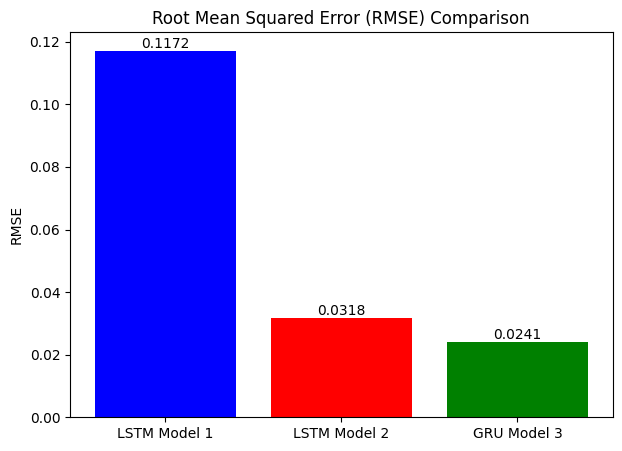

In [90]:
plt.figure(figsize=(7, 5))
bars = plt.bar(models, rmse_values, color=['blue', 'red', 'green'])
plt.title('Root Mean Squared Error (RMSE) Comparison')
plt.ylabel('RMSE')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.4f}", ha='center', va='bottom')

plt.show()

MSE

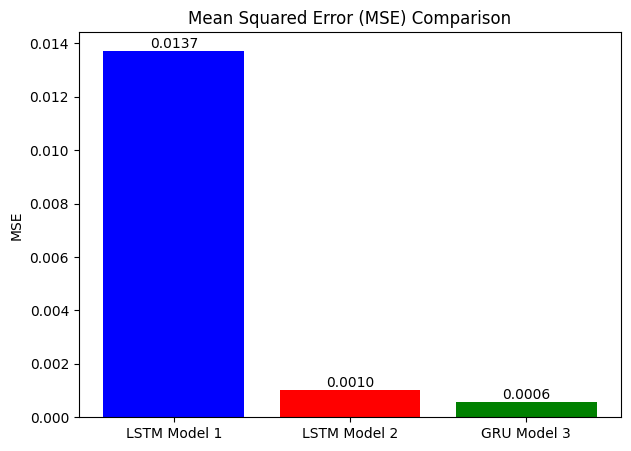

In [91]:
plt.figure(figsize=(7, 5))
bars= plt.bar(models, mse_values, color=['blue', 'red', 'green'])
plt.title('Mean Squared Error (MSE) Comparison')
plt.ylabel('MSE')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.4f}", ha='center', va='bottom')
plt.show()


Loss Curves

Model 01

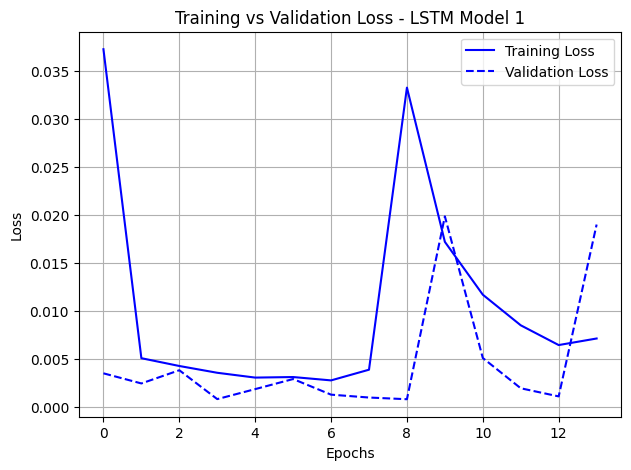

In [92]:
plt.figure(figsize=(7, 5))
plt.plot(history1.history['loss'], label='Training Loss', color='blue')
plt.plot(history1.history['val_loss'], label='Validation Loss', color='blue', linestyle='dashed')
plt.title('Training vs Validation Loss - LSTM Model 1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

Model 02 

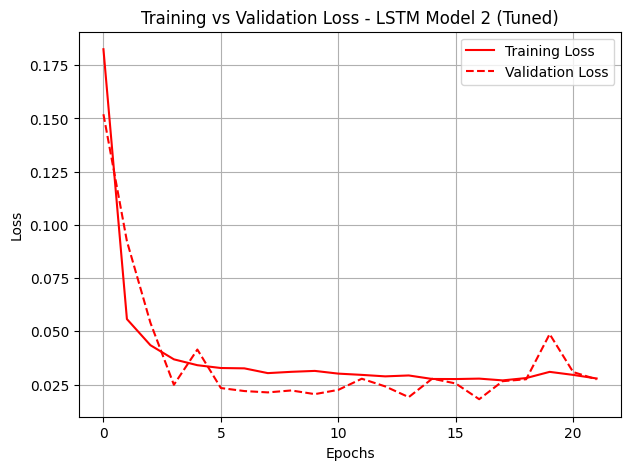

In [93]:
plt.figure(figsize=(7, 5))
plt.plot(history2.history['loss'], label='Training Loss', color='red')
plt.plot(history2.history['val_loss'], label='Validation Loss', color='red', linestyle='dashed')
plt.title('Training vs Validation Loss - LSTM Model 2 (Tuned)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

Model 03

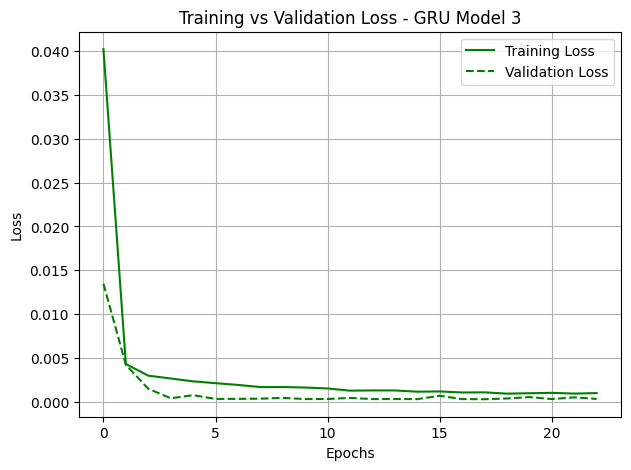

In [94]:
plt.figure(figsize=(7, 5))
plt.plot(history3.history['loss'], label='Training Loss', color='green')
plt.plot(history3.history['val_loss'], label='Validation Loss', color='green', linestyle='dashed')
plt.title('Training vs Validation Loss - GRU Model 3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


Residual Analysis

In [95]:
residuals_model1 = y_test - pred_model1.flatten()
residuals_model2 = y_test - pred_model2.flatten()
residuals_model3 = y_test - pred_model3.flatten()

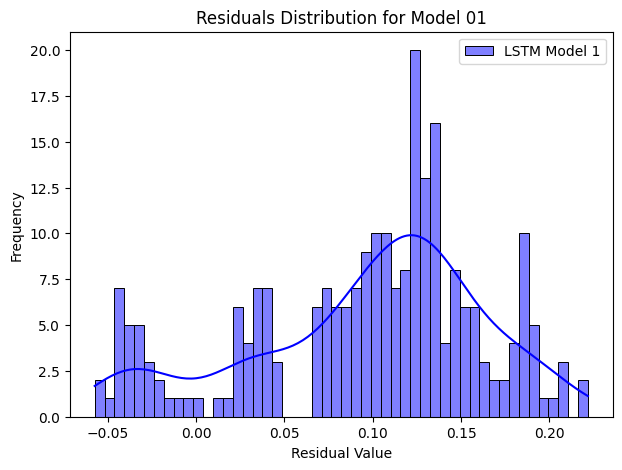

In [96]:
plt.figure(figsize=(7, 5))
sns.histplot(residuals_model1, bins=50, color="blue", label="LSTM Model 1", kde=True)
plt.title('Residuals Distribution for Model 01')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Model 02

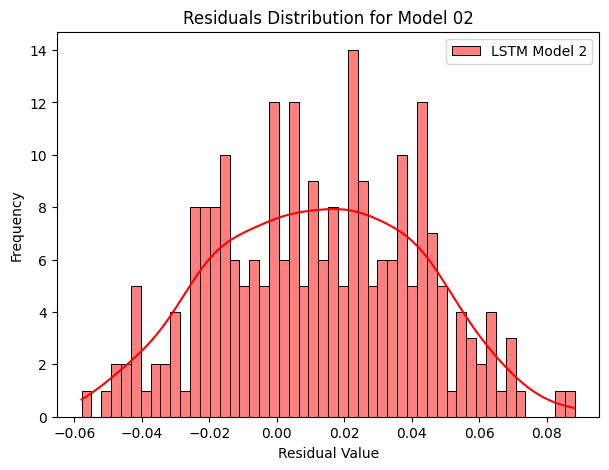

In [97]:
plt.figure(figsize=(7, 5))
sns.histplot(residuals_model2, bins=50, color="red", label="LSTM Model 2", kde=True)
plt.title('Residuals Distribution for Model 02')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Model 03

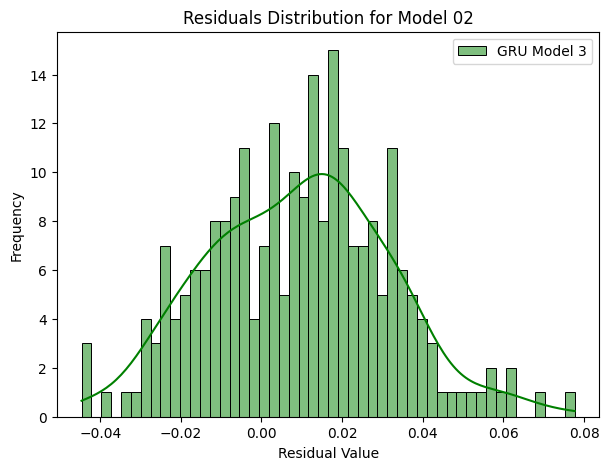

In [98]:
plt.figure(figsize=(7, 5))
sns.histplot(residuals_model3, bins=50, color="green", label="GRU Model 3", kde=True)
plt.title('Residuals Distribution for Model 02')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


R_squared

In [99]:
r2_model1 = r2_score(y_test, pred_model1)
r2_model2 = r2_score(y_test, pred_model2)
r2_model3 = r2_score(y_test, pred_model3)

In [100]:
print(f"Model 1 (LSTM) R_squared Score: {r2_model1:.4f}")
print(f"Model 2 (LSTM Tuned) R_squared Score: {r2_model2:.4f}")
print(f"Model 3 (GRU) R_squared Score: {r2_model3:.4f}")

Model 1 (LSTM) R_squared Score: 0.0149
Model 2 (LSTM Tuned) R_squared Score: 0.9274
Model 3 (GRU) R_squared Score: 0.9582


Actual vs Predicted

Model 01

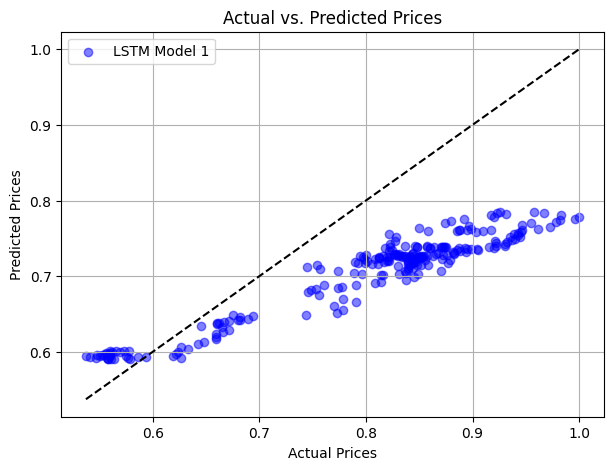

In [101]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test, pred_model1, color='blue', alpha=0.5, label="LSTM Model 1")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="black")  
plt.title("Actual vs. Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.grid()
plt.show()


Model 02

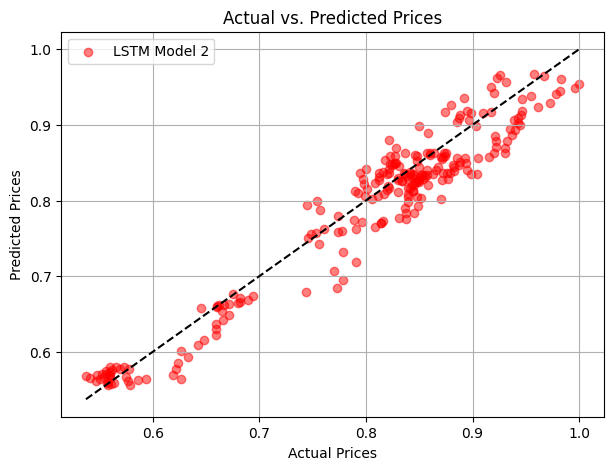

In [102]:

plt.figure(figsize=(7, 5))
plt.scatter(y_test, pred_model2, color='red', alpha=0.5, label="LSTM Model 2")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="black")  
plt.title("Actual vs. Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.grid()
plt.show()


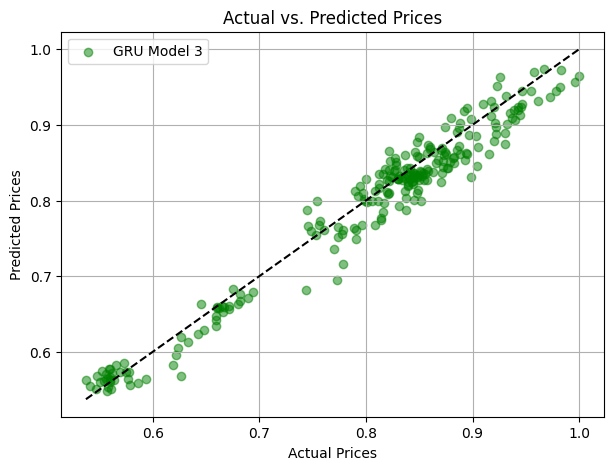

In [103]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test, pred_model3, color='green', alpha=0.5, label="GRU Model 3")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="black")  
plt.title("Actual vs. Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.grid()
plt.show()


### PART 17 Conclusion


##### To conclude, overall, it was noticeable that the third model, or the model that used GRU, performed the best, which achieved the lowest errors compared to the three models. The GRU model had a Mean Absolute Error (MAE) which consisted of 0.0196, Root Mean Square Error (RMSE) of 0.0241, and lastly, Mean Square Error (MSE) of 0.0006, which shows this predicted Uber’s stock prices the most accurately.The first LSTM model had an MAE of 0.1052, RMSE of 0.1172, and MSE of 0.0137, and the second LSTM model had performed better than Model 1 and had the following results: MAE of 0.0261, RMSE of 0.0318, and MSE of 0.001. The R-squared measures how well a model is able to explain the stock price trends, and GRU showed the best score at 0.9582, which states that it is a strong model to be able to capture the trends. Model 02 showed an R-squared score of 0.9274, and the first model was extremely low at 0.0149. The reason it was low was that it was having a hard time predicting stock prices. Afterwards, model evaluation was required, and it was noticeable that the GRU model closely followed the stock prices. The two LSTM models were not showing a reliable outlook as they were showing more ups and downs. The residual analysis then further helped to check how many of the predictions were different from the real prices, and overall, GRU had the least amount of errors - which represents that it is a strong model. From this research, it can be understood that GRU models are much better than the LSTM models for predicting stock prices, as they are able to check past trends more efficiently compared to an LSTM. Hyperparameter tuning is important as if we adjust settings, there is a major difference in performance, and that is what happened between the first and second LSTM model. Overall, GRU or the third model was the best to predict stock prices for the ride-sharing company. Future research can be focused on financial indicators, better feature selection, and as well as a larger dataset.

### PART 18 Management Question

##### This research is important to the outside world as stock price predictions will help people like investors, businesses, and financial analysts make better decisions on market trends and investments. By using models like LSTM and GRU, we can understand which procedure will drive towards a positive answer for capturing patterns. Understanding these models will help improve forecasting accuracy, and this is very helpful for anyone who is in the financial-related fields.

### PART 20 References

Northwestern University. *Module 9 Assignment 2: Financial Time Series*.  
[https://canvas.northwestern.edu/courses/222806/assignments/1546801](https://canvas.northwestern.edu/courses/222806/assignments/1546801).  
Accessed March 9, 2025.
